In [3]:
#importing stuff
from astropy.table import Table, join, unique
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import matplotlib.colors as colors
from matplotlib.ticker import MultipleLocator, FixedLocator, FormatStrFormatter
%matplotlib inline 

import h5py

In [4]:
#reading files using Table.read function in astropy.table
data_summary_6811 = Table.read("summary_ngc6811.csv")
data_xmatch_6811 = Table.read("summary_ngc6811_xmatch_gaiadr3.csv")

In [5]:
#data_xmatch_6811.info
#data_summary_6811.info

In [6]:
#isolating the columns that is needed in the output table 
data_xmatch_6811.sort(keys = 'angDist')
data_gaia_6811_columnsneeded = unique(data_xmatch_6811['angDist','id', 'RAdeg', 'e_RAdeg', 'DEdeg', 'e_DEdeg', 'DR3Name'],keys='id')
data_gaia_6811_columnsneeded.sort(keys = ['id', 'angDist'])
data_gaia_6811_columnsneeded2 = unique(data_gaia_6811_columnsneeded['angDist','id', 'RAdeg', 'e_RAdeg', 'DEdeg', 'e_DEdeg', 'DR3Name'],keys='DR3Name')

In [7]:
#using join function to crossmatch the two tables
combined_table = join(data_summary_6811, data_gaia_6811_columnsneeded2, keys='id', join_type ='right')
combined_table_wantedcolumns= combined_table['angDist', 'id', 'hjd', 'ra', 'dec','v', 'bv', 'teff', 'feh', 'feh_err', 'logg', 'logg_err', 'rv', 'rve','vsini', 'vsini_err','RAdeg', 'e_RAdeg', 'DEdeg', 'e_DEdeg', 'DR3Name']

In [8]:
#combined_table.info

In [9]:
combined_table_wantedcolumns.write('Combined_Data_6811.csv', format ='csv', overwrite = True)

In [10]:
#using unique function to get the first instance of each id 
unique_ids = unique(data_xmatch_6811, keys = 'id') #do this for just xmatch data add v and bv from summary table 
unique_ids.sort(keys = ['id', 'angDist'])
unique_ids2 = unique(unique_ids, keys = 'DR3Name')

In [11]:
unique_kic_id = unique(data_summary_6811['id', 'v', 'bv'], keys = 'id')

In [12]:
unique_ids_combined = join(unique_ids2, unique_kic_id)

In [13]:
#using numpy unique function to get the values of the unique ids and how many times they appear 
values, counts = np.unique(unique_ids_combined['id'], return_counts=True)

In [14]:
#seeing where the unique values appear more than once 
duplicates = counts > 1

In [15]:
#using the location of the duplicated unique values to find which ids are duplicated 
duplicated_ids=values[np.where(duplicates)]

In [16]:
len(unique_ids_combined)

3422

In [17]:
len(duplicated_ids)

0

In [18]:
unique_ids_combined.write('Combined_Data_Unique_6811.csv', format = 'csv', overwrite = True)

In [19]:
#function that plots V vs B-V as long as the input has columns labled bv and v
def VvsBV(tbl):
    fig, ax = plt.subplots()
    ax.plot(tbl['bv'], tbl['v'], '.', alpha = 0.25)
    ax.set_xlabel('B-V')
    ax.set_ylabel('V')
    ax.tick_params(axis='both', direction='in', length=6, top=True, right=True)
    XminorLocator = MultipleLocator(0.05)
    YminorLocator = MultipleLocator(0.5)
    ax.xaxis.set_minor_locator(XminorLocator)
    ax.yaxis.set_minor_locator(YminorLocator)
    ax.tick_params(which='minor',axis='both',direction='in',length=3,top=True,right=True)
    ax.invert_yaxis()
    plt.show();
    

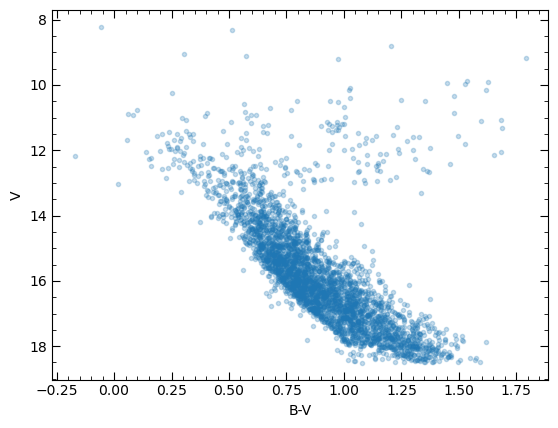

In [20]:
#trying out the function with the 6811 data from above
VvsBV(unique_ids_combined)

In [21]:
#function that plots G vs BP-RP
def GvsBPRP(tbl):
    fig, ax = plt.subplots()
    ax.plot(tbl['BP-RP'], tbl['Gmag'], '.', alpha = 0.25)
    ax.set_xlabel('BP-RP')
    ax.set_ylabel('Gmag')
    ax.tick_params(axis='both', direction='in', length=6, top=True, right=True)
    XminorLocator = MultipleLocator(0.25)
    YminorLocator = MultipleLocator(0.5)
    ax.xaxis.set_minor_locator(XminorLocator)
    ax.yaxis.set_minor_locator(YminorLocator)
    ax.tick_params(which='minor',axis='both',direction='in',length=3,top=True,right=True)
    ax.invert_yaxis() #flip y axis
    plt.show();

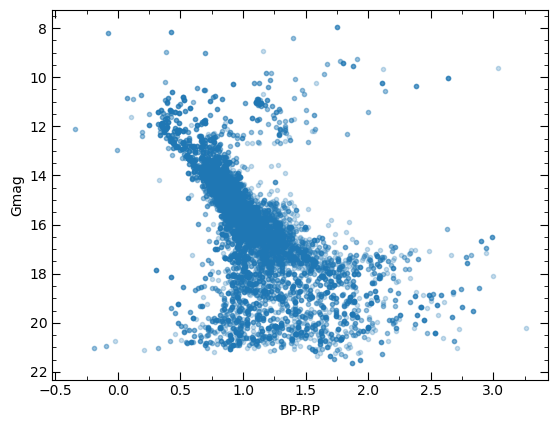

In [22]:
GvsBPRP(data_xmatch_6811)

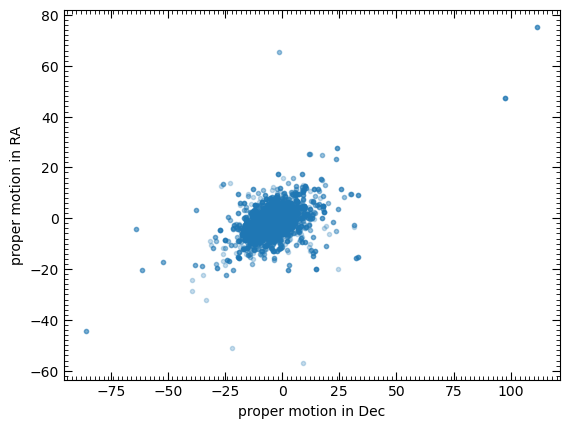

In [23]:
#plot proper motion in Ra vs proper motion in Dec 
fig, ax = plt.subplots()
ax.plot(data_xmatch_6811['pmDE'], data_xmatch_6811['pmRA'], '.', alpha = 0.25)
ax.set_xlabel('proper motion in Dec')
ax.set_ylabel('proper motion in RA')
ax.tick_params(axis='both', direction='in', length=6, top=True, right=True)
XminorLocator = MultipleLocator(2)
YminorLocator = MultipleLocator(2)
ax.xaxis.set_minor_locator(XminorLocator)
ax.yaxis.set_minor_locator(YminorLocator)
ax.tick_params(which='minor',axis='both',direction='in',length=3,top=True,right=True)

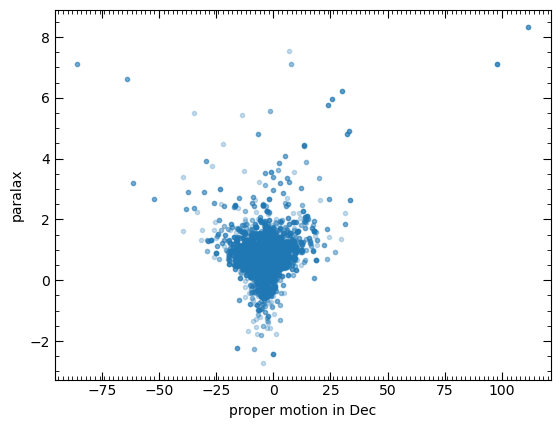

In [24]:
#plot paralax vs proper motion in Dec
fig, ax = plt.subplots()
ax.plot(data_xmatch_6811['pmDE'], data_xmatch_6811['Plx'], '.', alpha = 0.25)
ax.set_xlabel('proper motion in Dec')
ax.set_ylabel('paralax')
ax.tick_params(axis='both', direction='in', length=6, top=True, right=True)
XminorLocator = MultipleLocator(2)
YminorLocator = MultipleLocator(.5)
ax.xaxis.set_minor_locator(XminorLocator)
ax.yaxis.set_minor_locator(YminorLocator)
ax.tick_params(which='minor',axis='both',direction='in',length=3,top=True,right=True)

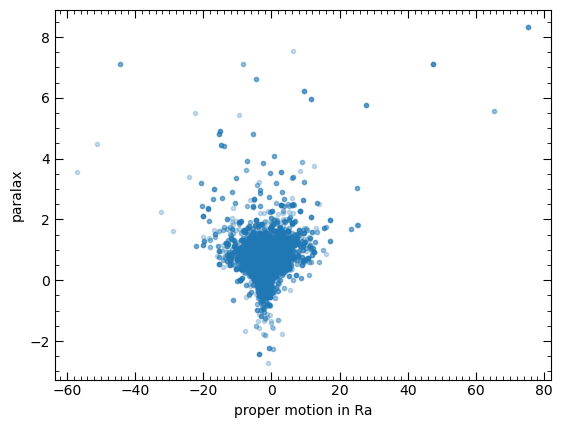

In [25]:
#plot paralax vs proper motion in RA
fig, ax = plt.subplots()
ax.plot(data_xmatch_6811['pmRA'], data_xmatch_6811['Plx'], '.', alpha = 0.25)
ax.set_xlabel('proper motion in Ra')
ax.set_ylabel('paralax')
ax.tick_params(axis='both', direction='in', length=6, top=True, right=True)
XminorLocator = MultipleLocator(2)
YminorLocator = MultipleLocator(.5)
ax.xaxis.set_minor_locator(XminorLocator)
ax.yaxis.set_minor_locator(YminorLocator)
ax.tick_params(which='minor',axis='both',direction='in',length=3,top=True,right=True)

In [26]:
#importing new data
data = h5py.File('/users/EllaMathews/Research/ngc6811_UTP_v1_new.h5', 'r')

In [27]:
membool = data['catalog']['MemBool'] #if 0 not in cluster if 1 in cluster

In [28]:
inCluster = data['catalog']['GAIAEDR3_ID'][membool == 1]

In [29]:
len(inCluster)

260

In [56]:
#data['catalog'].dtype

In [31]:
bprp = data['catalog']['GAIAEDR3_BP'] - data['catalog']['GAIAEDR3_RP']

Text(0, 0.5, 'G')

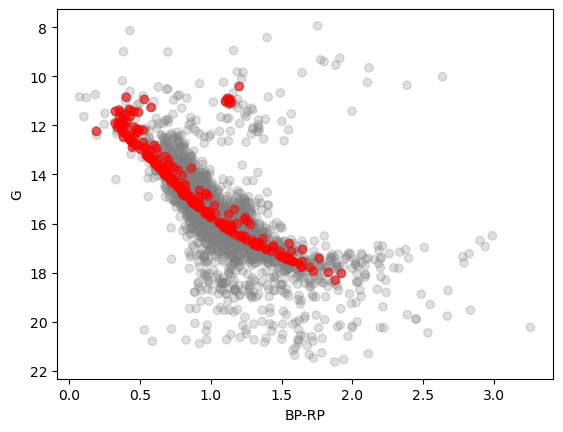

In [44]:
fig, ax = plt.subplots()
x = bprp
y = data['catalog']['GAIAEDR3_G']
plt.scatter(x, y, c='gray', alpha = (membool+1)*.25)
plt.scatter(x[membool==1], y[membool==1], c='red', alpha = .5)
ax.invert_yaxis()
ax.set_xlabel('BP-RP')
ax.set_ylabel('G')

Text(0, 0.5, 'G')

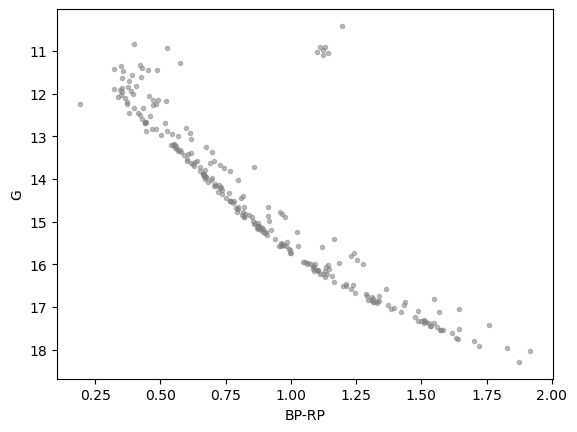

In [43]:
fig, ax = plt.subplots()
ax.scatter(x[membool == 1], y[membool == 1], alpha = .5, marker ='.', color = 'gray')
ax.invert_yaxis()
ax.set_xlabel('BP-RP')
ax.set_ylabel('G')

In [34]:
#add another plot over this one with the data that we have rvs for 

In [35]:
dr3names = combined_table_wantedcolumns['DR3Name']
dr3nums = []
for name in dr3names:
    num = np.int64(name[9:])
    dr3nums.append(num)

In [36]:
values2 = np.unique(combined_table_wantedcolumns['DR3Name'])

In [37]:
values3 = []
for name in values2:
    num = np.int64(name[9:])
    values3.append(num)

In [80]:
checkvalues = []
checkvalues2 = []
counts3 = []
for num in inCluster:
    if num in values3:
        checkvalues.append(True)
        checkvalues2.append(False)
        count = dr3nums.count(num)
        counts3.append(count)
    else:
        checkvalues.append(False)
        checkvalues2.append(True)


In [39]:
xcluster = x[membool == 1]
ycluster = y[membool == 1]

Text(0, 0.5, 'G')

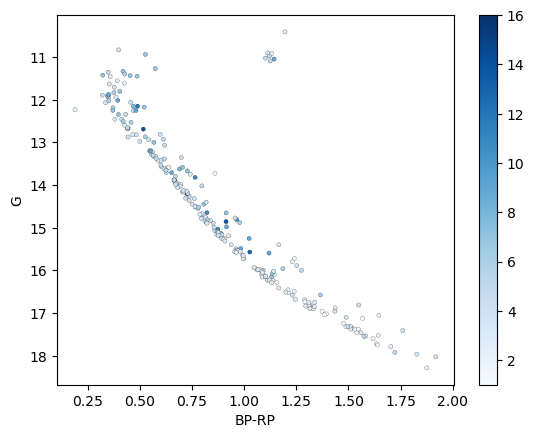

In [64]:
fig, ax = plt.subplots()
#plt.scatter(xcluster, ycluster, alpha = .5, marker ='.', color = 'gray')
scatter = plt.scatter(xcluster[checkvalues], ycluster[checkvalues], marker = '.', c=counts3, cmap = 'Blues', edgecolors = 'black', linewidths = 0.15)
#add legend of what colors mean
plt.colorbar(scatter)
#legend1 = ax.legend(*scatter.legend_elements(num=16),
                   # loc=0, title="# of Points")
ax.invert_yaxis()
ax.set_xlabel('BP-RP')
ax.set_ylabel('G')

In [41]:
print(counts3)

[5, 1, 12, 4, 5, 1, 5, 8, 5, 3, 7, 6, 4, 7, 4, 5, 3, 2, 5, 2, 1, 2, 3, 3, 6, 6, 7, 3, 3, 6, 7, 5, 4, 3, 3, 2, 14, 3, 8, 5, 4, 9, 5, 4, 5, 5, 4, 2, 10, 4, 14, 5, 11, 3, 3, 9, 3, 3, 3, 4, 3, 4, 3, 2, 3, 3, 2, 3, 2, 6, 2, 1, 1, 3, 9, 9, 4, 7, 6, 7, 3, 5, 3, 4, 4, 4, 2, 9, 4, 3, 2, 3, 4, 3, 2, 5, 4, 4, 5, 7, 3, 4, 5, 16, 5, 4, 6, 4, 4, 3, 2, 3, 4, 5, 5, 3, 4, 3, 4, 6, 5, 4, 1, 1, 3, 3, 4, 3, 3, 3, 1, 2, 3, 1, 7, 2, 3, 4, 6, 3, 3, 1, 2, 4, 4, 7, 4, 4, 4, 7, 4, 9, 4, 6, 4, 3, 9, 6, 9, 2, 3, 2, 4, 3, 5, 2, 5, 7, 9, 4, 5, 5, 5, 3, 4, 5, 7, 4, 4, 4, 4, 3, 3, 3, 7, 6, 3, 3, 5, 3, 3, 4, 3, 3, 7, 5, 3, 4, 4, 13, 3, 4, 8, 3, 5, 6, 6, 4, 3, 5, 9, 3, 3, 5, 4, 7, 7, 3, 5, 2, 3, 3, 1, 4, 3, 4, 9, 3, 3, 3, 3, 1, 3, 11, 8, 3, 1, 4, 4, 1, 5, 3, 11, 3, 3, 2, 1, 7, 3, 5, 4, 2, 2, 4]


In [45]:
combined_table_wantedcolumns.info

<Table length=8155>
   name    dtype 
--------- -------
  angDist float64
       id   int64
      hjd float64
       ra float64
      dec float64
        v float64
       bv float64
     teff   int64
      feh float64
  feh_err float64
     logg float64
 logg_err float64
       rv float64
      rve float64
    vsini float64
vsini_err float64
    RAdeg float64
  e_RAdeg float64
    DEdeg float64
  e_DEdeg float64
  DR3Name   str28

Text(0, 0.5, 'G')

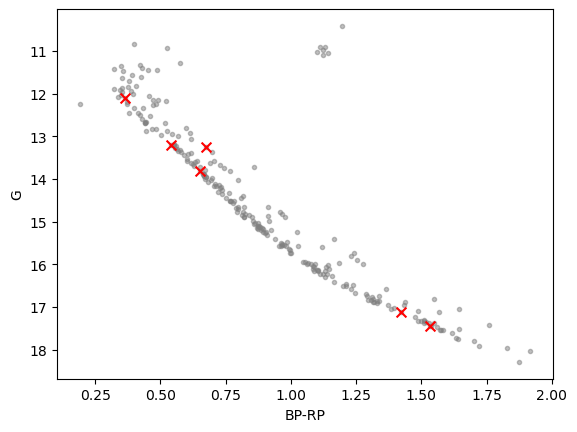

In [88]:
fig, ax = plt.subplots()
#ax.scatter(x, y, marker ='.', color = 'gray') #all in the catalog 
plt.scatter(xcluster, ycluster, marker = '.', c = 'grey', alpha = 0.5) #in the catalog and in the cluster
plt.scatter(xcluster[checkvalues2], ycluster[checkvalues2], marker = 'x', c = 'red', s=50) #in the catalog and in the cluster and do not have data for 

ax.invert_yaxis()
ax.set_xlabel('BP-RP')
ax.set_ylabel('G')